# Ajuste Polinomial

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
#plt.rcParams['font.size'] = '10'

Matriz Vandermonde
[[ 1.  0.  0.]
 [ 1.  1.  1.]
 [ 1.  2.  4.]
 [ 1.  3.  9.]
 [ 1.  4. 16.]
 [ 1.  5. 25.]
 [ 1.  6. 36.]
 [ 1.  7. 49.]
 [ 1.  8. 64.]
 [ 1.  9. 81.]]


Text(0, 0.5, 'Voltage')

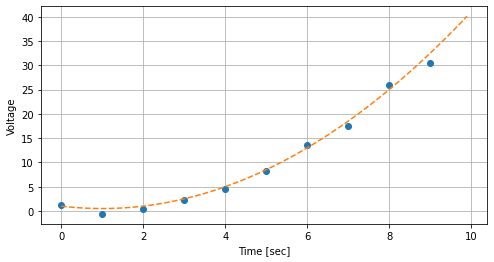

In [104]:
# Modelo polinomial
t = np.arange(10)
Nt = len(t)
p = np.array([1,-1,0.5])
Np = len(p)

# Matriz de observación
H = np.zeros([Nt,Np])
for n in range(Np):
    H[:,n] = t**n

# Ruido
sigma = 1
w = sigma*np.random.randn(Nt)

# Observaciones
x = H @ p + w
print('Matriz Vandermonde')
print(H)

# Polinomio
t1 = Nt * np.arange(100)/100
x1 = 0
for n in range(Np):
    x1 += p[n]*t1**n

# Graficos
plt.figure(figsize=[8,4])
plt.plot(t,x,'o')
plt.plot(t1,x1,'--')
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage')

In [105]:
# Estimador insesgado de Varianza mínima
pe = np.linalg.inv(H.T@H)@H.T@x
Cp = sigma**2 * np.linalg.inv(H.T@H)
print('Estimador MVUE:')
print(pe)
print('Covarianza:')
print(Cp)
print('Desviación standard:')
print(np.sqrt(np.diag(Cp)))


Estimador MVUE:
[ 0.36437989 -0.74911614  0.46942857]
Covarianza:
[[ 0.61818182 -0.25909091  0.02272727]
 [-0.25909091  0.1655303  -0.01704545]
 [ 0.02272727 -0.01704545  0.00189394]]
Desviación standard:
[0.78624539 0.40685415 0.04351941]


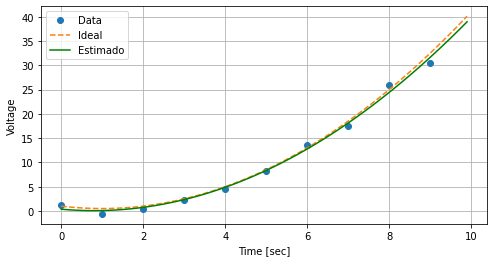

In [106]:
# Polinomio
t2 = Nt * np.arange(100)/100
x2 = 0
for n in range(Np):
    x2 += pe[n]*t2**n

# Graficos Estimador MVUE
plt.figure(figsize=[8,4])
plt.plot(t,x,'o')
plt.plot(t1,x1,'--')
plt.plot(t2,x2,'g')
plt.grid('on')
plt.xlabel('Time [sec]')
plt.ylabel('Voltage')
plt.legend(['Data','Ideal','Estimado'])